# BasicODESolver

### Imports

In [1]:
import sys
import os
import numpy
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '../../')))
import gillespy2.core.gillespySolver
import gillespy2
from gillespy2.core.gillespyError import SolverError, DirectoryError, BuildError, ExecutionError
from gillespy2.solvers.numpy.basic_ode_solver import BasicODESolver

### Model Instantiation

Model must include rates, species, and reactions

In [2]:
import gillespy2
class MichaelisMenten(gillespy2.Model):
     def __init__(self, parameter_values=None):
            #initialize Model
            gillespy2.Model.__init__(self, name="Michaelis_Menten")
            
            #parameters
            rate1 = gillespy2.Parameter(name='rate1', expression= 0.0017)
            rate2 = gillespy2.Parameter(name='rate2', expression= 0.5)
            rate3 = gillespy2.Parameter(name='rate3', expression = 0.1)
            self.add_parameter([rate1,rate2,rate3])
            
            #Species
            A = gillespy2.Species(name='Substrate', initial_value=301)
            B = gillespy2.Species(name='Enzyme', initial_value=120)
            C = gillespy2.Species(name='Enzyme_Substrate_Complex', initial_value=0)
            D = gillespy2.Species(name='Product', initial_value=0)
            self.add_species([A,B,C,D])
            
            #reactions
            r1 = gillespy2.Reaction(name="r1",reactants={A:1,B:1}, products={C:1},
                   rate=rate1)
            
            r2 = gillespy2.Reaction(name="r2",reactants={C:1}, products={A:1,B:1},
                    rate=rate2)
            
            r3 = gillespy2.Reaction(name="r3",reactants={C:1}, products={B:1,D:1},
                    rate=rate3)
            self.add_reaction([r1,r2,r3])
            self.timespan(numpy.linspace(0,100,101))

In [3]:
model = MichaelisMenten()


### Run Model and plot
Run the model by calling the run function on the model and select solver via 'solver' keyword argument.  if show_labels is True, results are returned as a list of dictionaries, where the list index is the trajectory run index, and dictionary keys are comprised of species names and 'time'.  If show_labels is False, results are returned as a numpy array with indices [trajectory][timestep][species_no]

In [4]:
%time results = model.run(solver=BasicODESolver(), show_labels=True)

CPU times: user 0 ns, sys: 0 ns, total: 0 ns
Wall time: 7.91 ms


In [5]:
results.plot(style="seaborn")

<Figure size 1296x720 with 1 Axes>

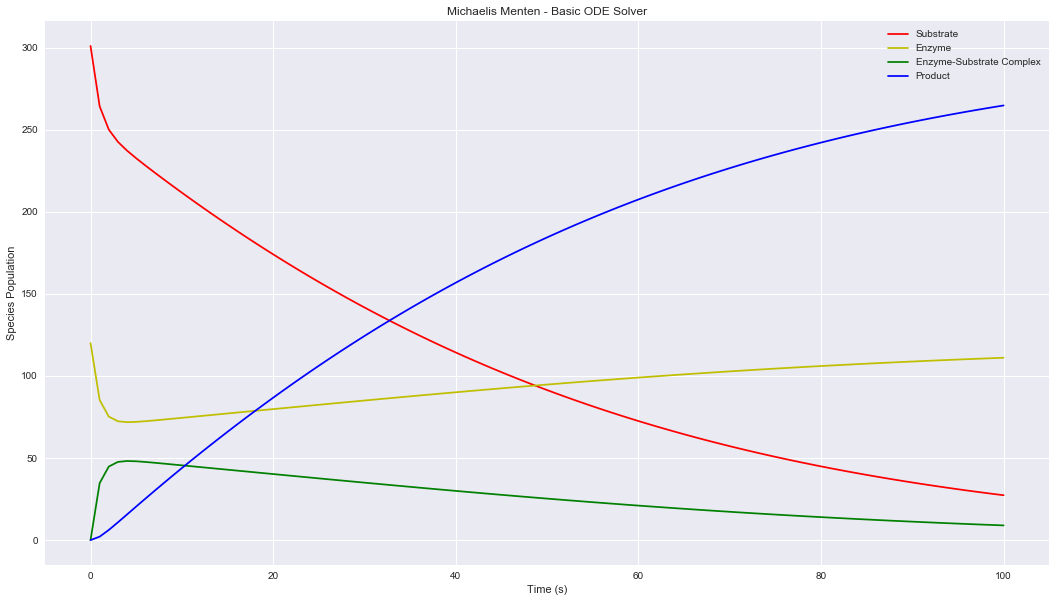

In [7]:
plt.figure(figsize=(18,10))
plt.title("Michaelis Menten - Basic ODE Solver")
plt.xlabel("Time (s)")
plt.ylabel("Species Population")
plt.plot(results['time'],results['Substrate'],'r', label='Substrate')
plt.plot(results['time'],results['Enzyme'],'y', label='Enzyme')
plt.plot(results['time'],results['Enzyme_Substrate_Complex'],'g', label='Enzyme-Substrate Complex')
plt.plot(results['time'],results['Product'],'b', label='Product')

plt.plot([0],[11])
plt.legend(loc='best')

In [6]:
%time dresults = model.run(solver=BasicODESolver, show_labels=False)

CPU times: user 15.6 ms, sys: 0 ns, total: 15.6 ms
Wall time: 9.6 ms


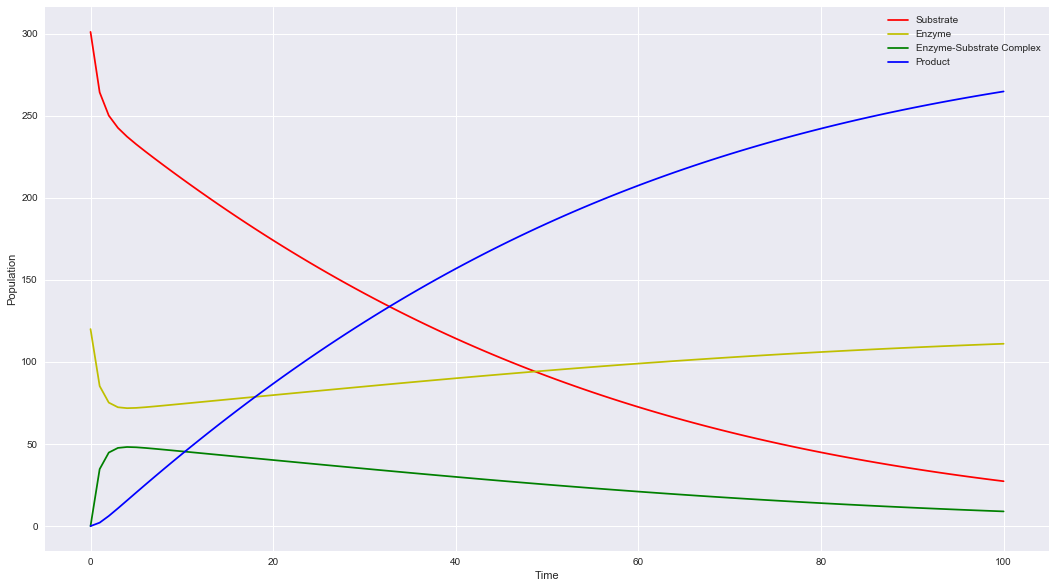

In [7]:
plt.figure(figsize=(18,10))
plt.xlabel("Time")
plt.ylabel("Population")
plt.plot(dresults[0][:,0],dresults[0][:,1],'r', label='Substrate')
plt.plot(dresults[0][:,0],dresults[0][:,2],'y', label='Enzyme')
plt.plot(dresults[0][:,0],dresults[0][:,3],'g', label='Enzyme-Substrate Complex')
plt.plot(dresults[0][:,0],dresults[0][:,4],'b', label='Product')


plt.plot([0],[11])
plt.legend(loc='best')